<a href="https://colab.research.google.com/github/swathise/homework3/blob/main/EW30050HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


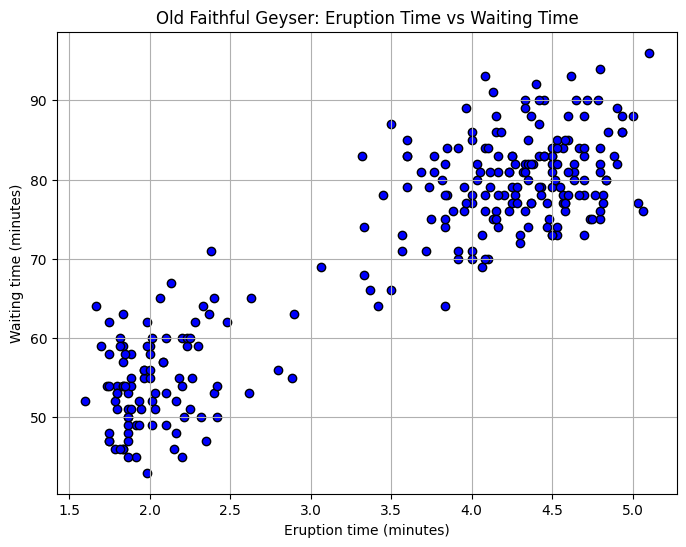

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/faithful.csv')

# Display the first few rows
print(data.head())

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['eruptions'], data['waiting'], c='blue', edgecolors='k')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('Old Faithful Geyser: Eruption Time vs Waiting Time')
plt.grid(True)
plt.show()


In [3]:
import numpy as np

# Prepare the data (ignore instance IDs if present)
X = data[['eruptions', 'waiting']].values

def kmeans(X, k=2, max_iters=100, tol=1e-4):
    np.random.seed(42)  # For reproducibility
    n_samples, n_features = X.shape

    # Randomly initialize centroids
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]

    # To store the objective function values
    objective_vals = []

    for i in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

        # Objective function (sum of squared distances)
        obj = sum(np.min(distances, axis=1)**2)
        objective_vals.append(obj)

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return centroids, clusters, objective_vals

# Run k-means
centroids, clusters, objective_vals = kmeans(X, k=2)


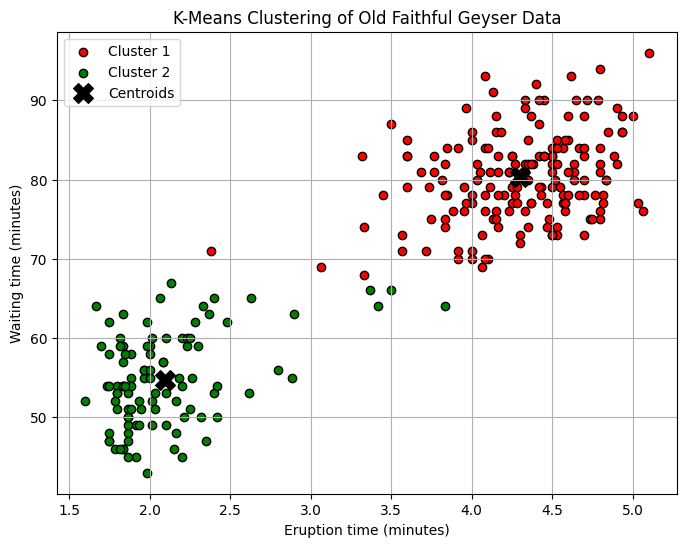

In [4]:
# Plot clusters
plt.figure(figsize=(8,6))
colors = ['red', 'green']

for i in range(2):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1],
                color=colors[i], label=f'Cluster {i+1}', edgecolors='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')

plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('K-Means Clustering of Old Faithful Geyser Data')
plt.legend()
plt.grid(True)
plt.show()


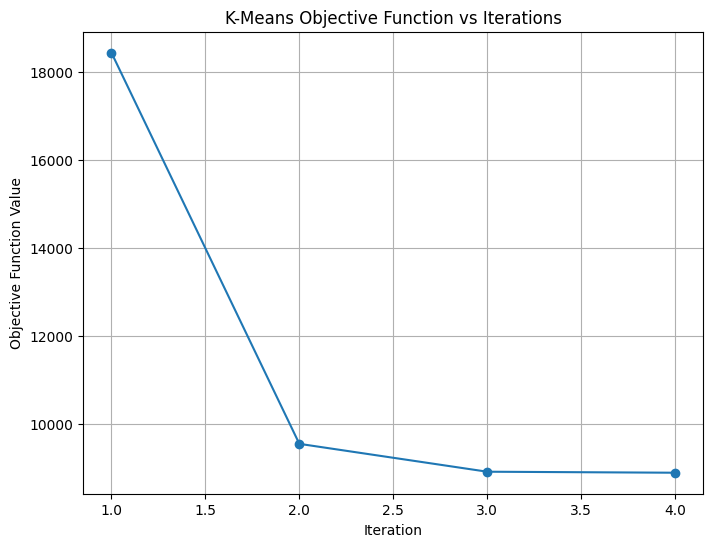

In [5]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(objective_vals) + 1), objective_vals, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('K-Means Objective Function vs Iterations')
plt.grid(True)
plt.show()
